# Librairie gestion de rasters : rasterio

Ce cours est téléchargeable à l'adresse https://github.com/sdunesme/formation-python

> Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.

N'hésitez pas à aller lire [la documentation de rasterio](https://rasterio.readthedocs.io/en/latest/)

Pour l'installer : 
```bash
conda install -c conda-forge rasterio
```

In [1]:
import rasterio as rio

## Ouverture d'une donnée raster

On ouvre un dataset (DatasetReader) avec la fonction rio.open(). Un dataset n'occupe que très peu de mémoire vive : seules les en-têtes du fichier sont lues, pas les données matricielles. 

In [2]:
import sys

###
# Sans contexte
src = rio.open('datasets/landsat/p196r028_7dt20010721_z31_10.tif')
'''
On utilise le dataset ici
'''
src.close() # Il faut penser à fermer le dataset pour libérer le fichier

###
# En utilisant un contexte (méthode à préférer)
with rio.open('datasets/landsat/p196r028_7dt20010721_z31_10.tif') as src:
    print('crs:', src.crs)
    print('bbox:', src.bounds)
    print('nombre de bandes:', src.count)
    print('taille:', src.shape)
    print('---')
    print('profile:', src.profile)
    print('---')
    print('RAM utilisée par le dataset (Mb):', sys.getsizeof(src)/1000000)

crs: EPSG:32631
bbox: BoundingBox(left=593985.0, bottom=4990065.0, right=846975.0, top=5213355.0)
nombre de bandes: 1
taille: (7443, 8433)
---
profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8433, 'height': 7443, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 593985.0,
       0.0, -30.0, 5213355.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
---
RAM utilisée par le dataset (Mb): 0.000248


Pour récupérer des données matricielles, on utilise la méthode .read() du dataset en précisant la bande si on souhaite n'en ouvrir qu'une.

In [3]:
# On ouvre le dataset avec un contexte
with rio.open('datasets/landsat/p196r028_7dt20010721_z31_10.tif') as src:
    band1 = src.read(1) # On charge le contenu de la bande 1 en mémoire, dans la variable band1
    profile = src.profile # On charge également le profile en mémoire pour pouvoir le réutiliser plus tard
    
    print('RAM utilisée par le dataset (Mb):', sys.getsizeof(src)/1000000)
# On quitte le contexte : le dataset est fermé et le fichier libéré, mais l'image et le profile restent chargés en mémoire

print('---')
print(src)
print('RAM utilisée par l\'image band1 (Mb):', sys.getsizeof(band1)/1000000)
print('profile:', profile)

RAM utilisée par le dataset (Mb): 0.000248
---
<closed DatasetReader name='datasets/landsat/p196r028_7dt20010721_z31_10.tif' mode='r'>
RAM utilisée par l'image band1 (Mb): 62.766947
profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8433, 'height': 7443, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 593985.0,
       0.0, -30.0, 5213355.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


In [4]:
# La bande 1 a été chargée en mémoire sous la forme d'un tableau numpy
band1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

On peux afficher cette image avec la fonction `show()` du module plot du package rasterio. Cette fonction est une "surcouche" à matplotlib.

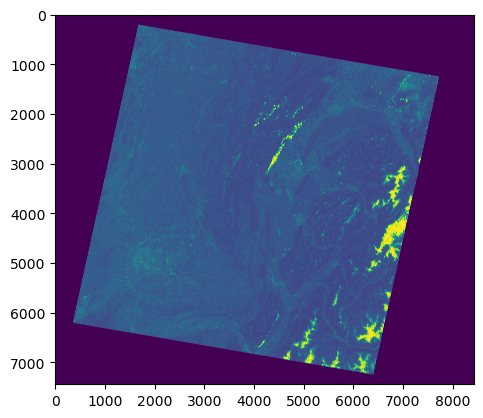

<AxesSubplot:>

In [5]:
from rasterio.plot import show

show(band1)

## Fusionner des bandes

Notre dataset landsat est composé de 4 bandes livrées dans des fichiers tiff séparés. On peux les fusionner avec rasterio.

La première étape est de charger les 4 bandes en mémoire.

In [6]:
# On créé un dictionnaire imbriqué dans lequel on va stocker le chemin du fichier pour chaque bande
liste_bandes = {
    'band1': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_10.tif'},
    'band2': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_20.tif'},
    'band3': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_30.tif'},
    'band4': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_40.tif'},
}

# Maintenant, on va charger en mémoire les données matricielles de chaque bande
# Pour cela, on va itérer sur les clés du dictionnaire liste_bandes
for bnd in liste_bandes:
    # On récupère le chemin du fichier correspondant à la bande actuellement traitée
    chemin_fichier = liste_bandes[bnd]['fichier']
    
    # On ouvre le dataset correspondant
    with rio.open(chemin_fichier) as src:
        
        # On charge l'image en mémoire dans le dictionnaire, sous un nouvelle clé "img"
        liste_bandes[bnd]['img'] = src.read(1)
        
print(liste_bandes)

{'band1': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_10.tif', 'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, 'band2': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_20.tif', 'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, 'band3': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_30.tif', 'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, 'band4': {'fichier': 'datasets/landsat/p196r028_7dt20010721_z31_40.tif', 'img': array([[0, 0, 0, ..

On va maintenant créer un nouveau fichier

In [7]:
# Il faut d'abord faire une modification sur le profil de l'image : elle n'a plus une seule bande mais 4
# Tout le reste (projection, driver, taille, etc.) ne change pas
profile['count'] = 4

# On ouvre ensuite un nouveau dataset en mode 'w' (write)
# On "déplie" le dictionnaire profile pour transformer tout son contenu en arguments nommés
with rio.open('datasets/output/landsat.tif', 'w', **profile) as dst:
    
    # On écrit les bandes chargées en mémoire dans le fichier
    dst.write(liste_bandes['band1']['img'], 1)
    dst.write(liste_bandes['band2']['img'], 2)
    dst.write(liste_bandes['band3']['img'], 3)
    dst.write(liste_bandes['band4']['img'], 4)
# On quitte le contexte, le dataset est fermé et le fichier est libéré 

# On pense à décharger la mémoire si on n'a plus besoin de l'image
liste_bandes = None

Si on n'a pas d'image "modèle" (c'est à dire que l'on créé une nouvelle image de toute pièce), il faudra définir le profil manuellement.

In [8]:
from rasterio.crs import CRS
from rasterio.transform import Affine

profile = {
    'driver': 'GTiff', # Le driver correspondant au format image souhaité (voir les drivers disponibles ici: https://gdal.org/drivers/raster/index.html)
    'dtype': 'uint8', # Le datatype (uint8, utin16, float32, etc.)
    'nodata': 0, # La valeur nodata
    'width': 8433, # Le nombre de pixels de l'image en largeur
    'height': 7443, # La nombre de pixels de l'image en hauteur
    'count': 1, # Le nombre de bandes
    'crs': CRS.from_epsg(32631), # La projection (en utilisant le code EPSG)
    'transform': Affine(30.0, 0.0, 593985.0, 0.0, -30.0, 5213355.0), # La fonction de transformation affine pour passer du référentiel image au référentiel géographique
}

?Affine

Init signature: Affine(a, b, c, d, e, f)
Docstring:     
Two dimensional affine transform for 2D linear mapping.

Parameters
----------
a, b, c, d, e, f : float
    Coefficients of an augmented affine transformation matrix

    | x' |   | a  b  c | | x |
    | y' | = | d  e  f | | y |
    | 1  |   | 0  0  1 | | 1 |

    `a`, `b`, and `c` are the elements of the first row of the
    matrix. `d`, `e`, and `f` are the elements of the second row.

Attributes
----------
a, b, c, d, e, f, g, h, i : float
    The coefficients of the 3x3 augumented affine transformation
    matrix

    | x' |   | a  b  c | | x |
    | y' | = | d  e  f | | y |
    | 1  |   | g  h  i | | 1 |

    `g`, `h`, and `i` are always 0, 0, and 1.

The Affine package is derived from Casey Duncan's Planar package.
See the copyright statement below.  Parallel lines are preserved by
these transforms. Affine transforms can perform any combination of
translations, scales/flips, shears, and rotations.  Class methods
are provide

On peux ré-ouvrir l'image et charger plusieurs bandes dans un seul tableau numpy.

RAM utilisée par l'image img (Mb): 251.06742
(4, 7443, 8433)


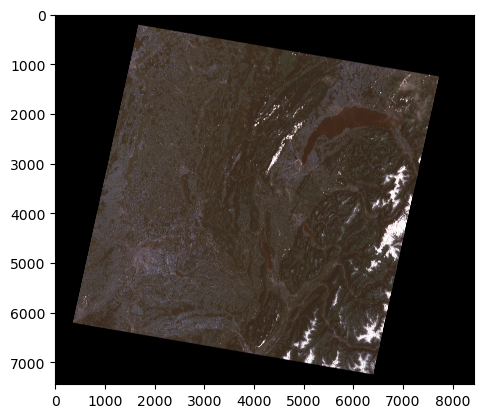

<AxesSubplot:>

In [9]:
with rio.open('datasets/output/landsat.tif', 'r') as src:
    img = src.read()
    
print('RAM utilisée par l\'image img (Mb):', sys.getsizeof(img)/1000000)
print(img.shape) # On affiche les dimensions de l'image

show(img[0:3]) # On affiche les 3 premières bandes

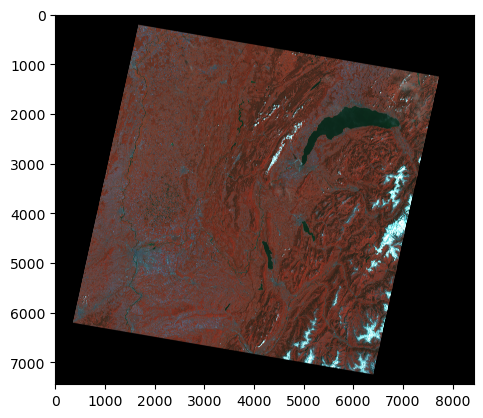

<AxesSubplot:>

In [10]:
# On peux choisir l'ordre d'affichage des bandes comme ceci
show([img[3], img[1], img[2]])

In [ ]:
# On pense à décharger l'image de la mémoire vive quand on a terminé de travailler dessus
img = None
print('RAM utilisée par l\'image img (Mb):', sys.getsizeof(img)/1000000)

## Masquer un raster avec un shapefile

In [20]:
import geopandas as gpd

mask_df = gpd.read_file('datasets/landsat/masque_rhone.gpkg')
mask_df

,geometry
0,"POLYGON ((634032.139 5022866.394, 644692.822 5..."


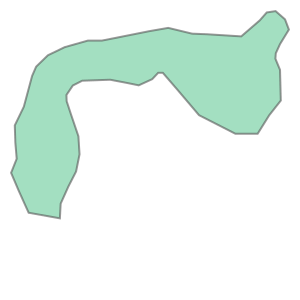

In [22]:
mask_polygon = mask_df['geometry'].loc[0]
mask_polygon

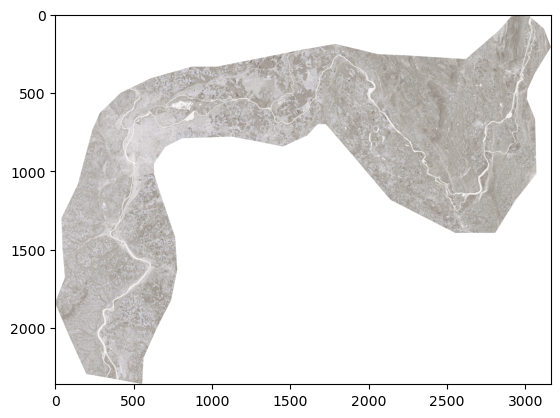

<AxesSubplot:>

In [38]:
from rasterio.mask import mask

with rio.open("datasets/output/landsat.tif") as src:
    masked_img, masked_transform = mask(src, [mask_polygon], crop=True)
    profile = src.profile
    
show(masked_img)

Pour enregistrer cette image, il faut faire des modifications dans le profil: la taille et la tranformation affine ont changé. La méthode `.update()` permet de mettre à jour plusieurs valeurs d'un dictionnaire à partir d'un autre.

In [42]:
profile.update({
    "height": masked_img.shape[1],
    "width": masked_img.shape[2],
    "transform": masked_transform
})

with rio.open('datasets/output/landsat_masked.tif', 'w', **profile) as dst:
    # On peux écrire les 3 bandes d'un coup
    dst.write(masked_img)

## Calculatrice raster

Il n'y a pas à proprement parler de calculatrice raster implémentée dans rasterio, mais cela n'est pas vraiment nécessaire vu la simplicité à effectuer ce genre d'opérations avec les tableaux numpy :

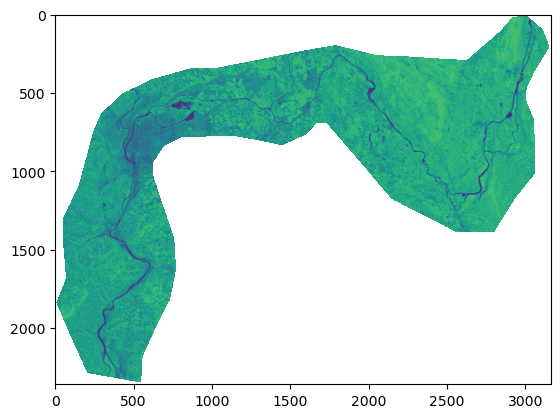

<AxesSubplot:>

In [58]:
import numpy as np

# On transforme nos pixels entier en flottants
float_img = masked_img.astype(np.float32)

# On remplace tous les 0 par des NaN pour éviter les divisions par 0
float_img[float_img == 0.0] = np.nan

# On fait notre calcul
ndvi = (float_img[3] - float_img[0]) / (float_img[3] + float_img[0])

show(ndvi)

In [60]:
# Pour écrire l'image sur le disque, il faut mettre à jour le profil
profile.update({
    'count': 1,
    'dtype': 'float32',
})

with rio.open('datasets/output/ndvi.tif', 'w', **profile) as dst:
    # On peux écrire les 3 bandes d'un coup
    dst.write(ndvi, 1)

## Pour aller plus loin avec rasterio



Rasterio gère nativement beaucoup d'autres opérations que l'on est amené à faire régulièrement avec des rasters : reprojections, géoréférencement, resampling, etc. 

La lecture par bloc des images volumineuses qui ne rentrent pas en entier dans la mémoire vive est également impémentée et relativement simple d'utilisation. 

Rendez-vous dans [la documentation de rasterio](https://rasterio.readthedocs.io/en/latest/) pour en savoir plus.